In [3]:
import os
import json
import pandas as pd
from datetime import datetime

DATA_DIR = 'data'

dynasty_rows = []
redraft_rows = []

for filename in os.listdir(DATA_DIR):
    if filename.endswith('.json'):
        filepath = os.path.join(DATA_DIR, filename)
        with open(filepath, 'r') as f:
            data = json.load(f)
            # Use 'lastUpdated' field for timestamp if available, else fallback to file mtime
            last_updated = data.get('lastUpdated')
            if last_updated:
                try:
                    # Remove 'Z' if present and parse as UTC
                    timestamp = datetime.fromisoformat(last_updated.replace('Z', '+00:00'))
                except Exception:
                    timestamp = datetime.fromtimestamp(os.path.getmtime(filepath))
            else:
                timestamp = datetime.fromtimestamp(os.path.getmtime(filepath))
            # Dynasty
            dynasty_row = {'timestamp': timestamp, 'filename': filename}
            if data.get('rankedByDynasty') and 'teams' in data['rankedByDynasty']:
                for team in data['rankedByDynasty']['teams']:
                    team_name = team.get('owner', '')
                    overall_value = team.get('overallValue', None)
                    if team_name:
                        dynasty_row[f'dynasty_team_{team_name}'] = overall_value
            dynasty_rows.append(dynasty_row)
            # Redraft
            redraft_row = {'timestamp': timestamp, 'filename': filename}
            if data.get('rankedByRedraft') and 'teams' in data['rankedByRedraft']:
                for team in data['rankedByRedraft']['teams']:
                    team_name = team.get('owner', '')
                    overall_value = team.get('overallValue', None)
                    if team_name:
                        redraft_row[f'redraft_team_{team_name}'] = overall_value
            redraft_rows.append(redraft_row)

# Create DataFrames
df_dynasty = pd.DataFrame(dynasty_rows).sort_values('timestamp').reset_index(drop=True)
df_redraft = pd.DataFrame(redraft_rows).sort_values('timestamp').reset_index(drop=True)

# Save to CSV (optional)
df_dynasty.to_csv('dynasty_rankings_by_timestamp.csv', index=False)
df_redraft.to_csv('redraft_rankings_by_timestamp.csv', index=False)

df_dynasty.tail()

,timestamp,filename,dynasty_team_dvdtequa,dynasty_team_pjwelling,dynasty_team_hunterm19,dynasty_team_mikulis,dynasty_team_benslayer68,dynasty_team_dbrickashawc,dynasty_team_schlaich,dynasty_team_mmasison,dynasty_team_thinkfast86,dynasty_team_diddledum,dynasty_team_izzyfromdwntwn,dynasty_team_dlaffs
7,2025-09-11 21:22:38.787479+00:00,fantasycalc_2025-09-12T07-12-19Z.json,70627,68781,67862,69846,68986,67566,65932,63822,62987,64729,65555,64079
8,2025-09-12 21:59:02.841666+00:00,fantasycalc_2025-09-13T07-10-41Z.json,70422,68424,67747,69457,68981,67413,65546,63519,63105,63982,65091,64137
9,2025-09-13 15:57:27.348121+00:00,fantasycalc_2025-09-14T07-11-03Z.json,70344,67943,67598,69648,68747,67101,65286,63766,63505,64012,64722,64228
10,2025-09-15 04:51:51.376214+00:00,fantasycalc_2025-09-15T07-13-45Z.json,71378,68821,67786,70264,69359,67493,66380,64374,64105,65273,65687,64856
11,2025-09-16 02:15:28.463294+00:00,fantasycalc_2025-09-16T07-13-35Z.json,72912,69759,67950,70910,68962,65456,66660,64527,64222,66109,66233,65523


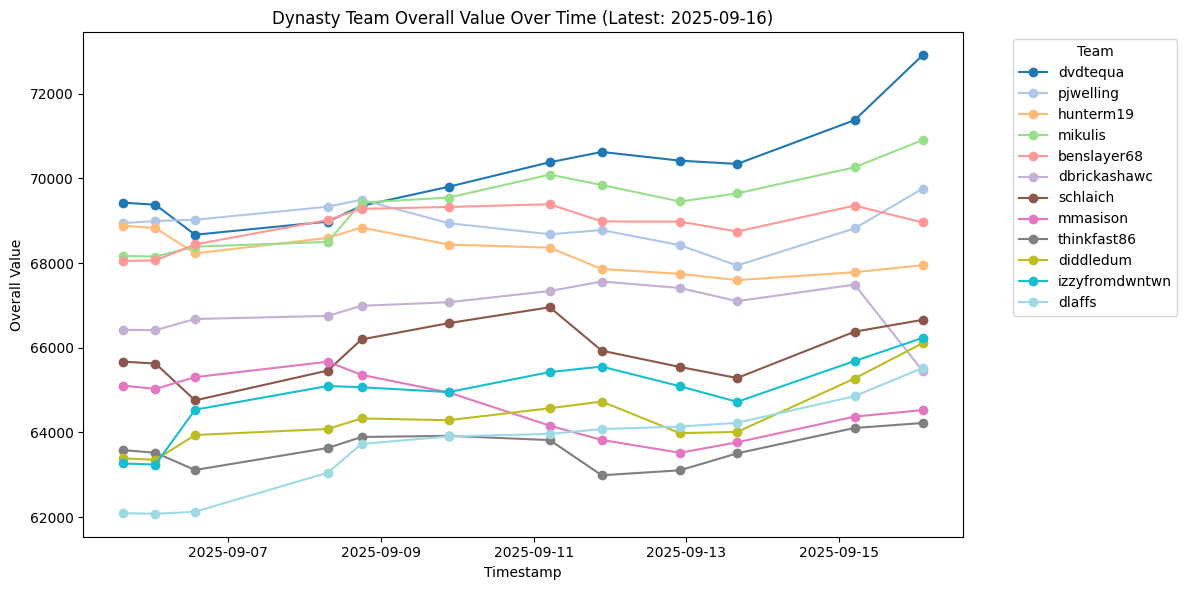

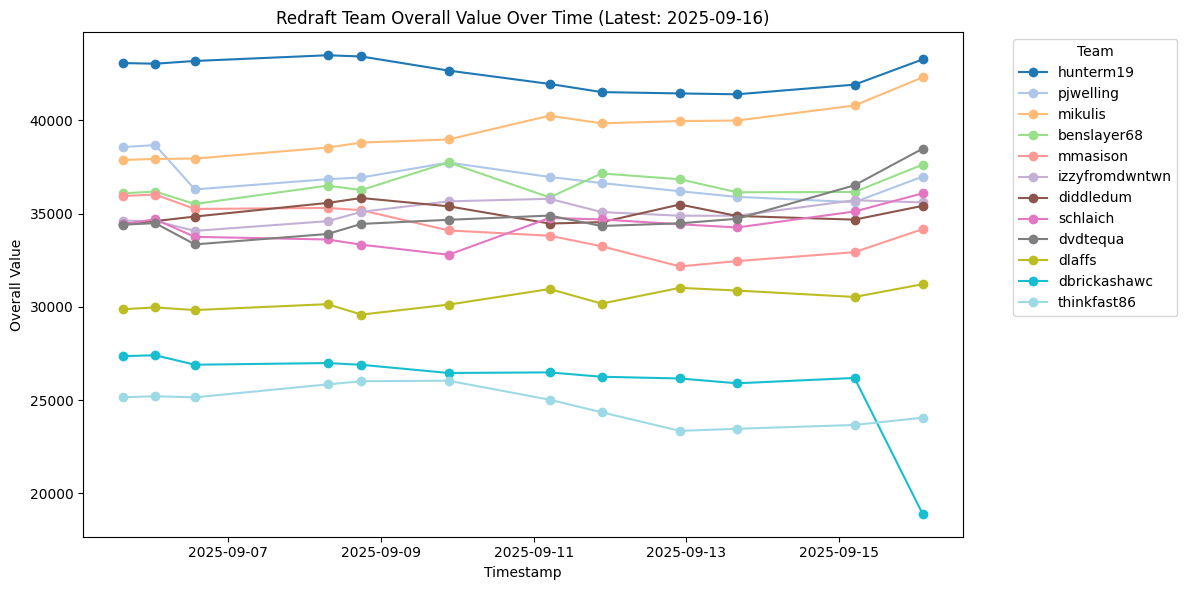

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Dynasty plot with distinct colors
dynasty_team_cols = [col for col in df_dynasty.columns if col.startswith('dynasty_team_')]
colors = plt.get_cmap('tab20', len(dynasty_team_cols))
latest_dynasty_date = df_dynasty['timestamp'].max().date()

plt.figure(figsize=(12, 6))
for idx, col in enumerate(dynasty_team_cols):
    plt.plot(df_dynasty['timestamp'], df_dynasty[col], marker='o', label=col.replace('dynasty_team_', ''), color=colors(idx))
plt.title(f'Dynasty Team Overall Value Over Time (Latest: {latest_dynasty_date})')
plt.xlabel('Timestamp')
plt.ylabel('Overall Value')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Redraft plot with distinct colors
redraft_team_cols = [col for col in df_redraft.columns if col.startswith('redraft_team_')]
colors = plt.get_cmap('tab20', len(redraft_team_cols))
latest_redraft_date = df_redraft['timestamp'].max().date()

plt.figure(figsize=(12, 6))
for idx, col in enumerate(redraft_team_cols):
    plt.plot(df_redraft['timestamp'], df_redraft[col], marker='o', label=col.replace('redraft_team_', ''), color=colors(idx))
plt.title(f'Redraft Team Overall Value Over Time (Latest: {latest_redraft_date})')
plt.xlabel('Timestamp')
plt.ylabel('Overall Value')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()